# **Prédiction des prix immobiliers**

> Bloc en retrait



In [ ]:
#Importer les principales bibliothèques pour la manipulation de données et la visualisation#
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Importation du jeu de données
dataset = pd.read_csv("/content/kc_house_data.csv")


In [ ]:
dataset.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Vérifier les statistiques des données.
dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
#Vérifier les noms des colonnes des données
dataset.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
space=dataset['sqft_living']
price=dataset['price']


In [ ]:
x = np.array(space).reshape(-1, 1)
y = np.array(price)

<ipython-input-34-dd1333b0c67f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['price'])


<Axes: xlabel='price', ylabel='Density'>

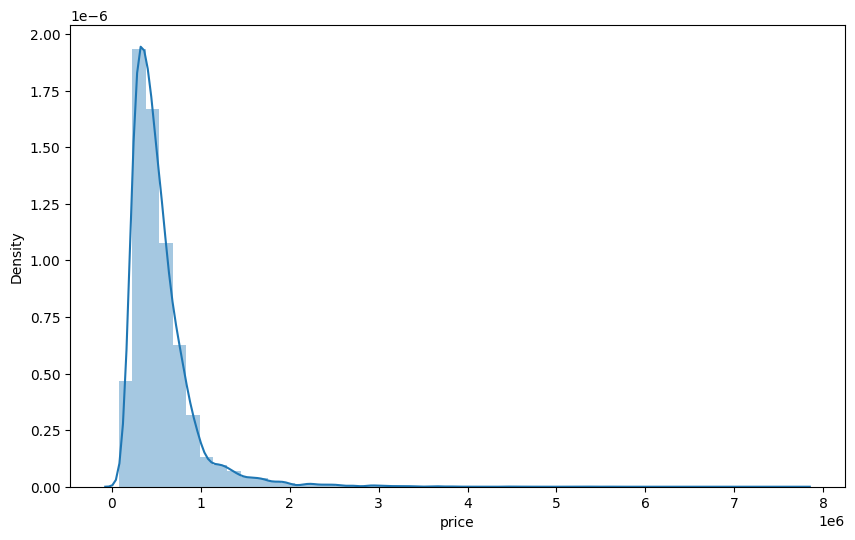

In [ ]:
#Visualisons la colonne des prix pour mieux comprendre.
plt.figure(figsize=(10,6))
sns.distplot(dataset['price'])

In [ ]:
#Division des données en ensemble d'entraînement et ensemble de test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
#Prédiction des prix
pred = regressor.predict(xtest)


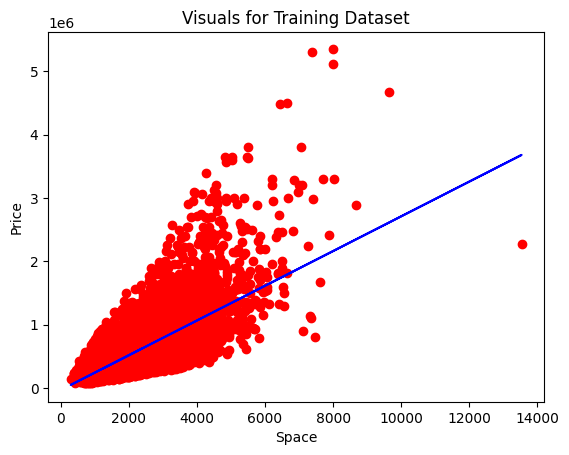

In [ ]:
#Visualisation des résultats d'entraînement
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

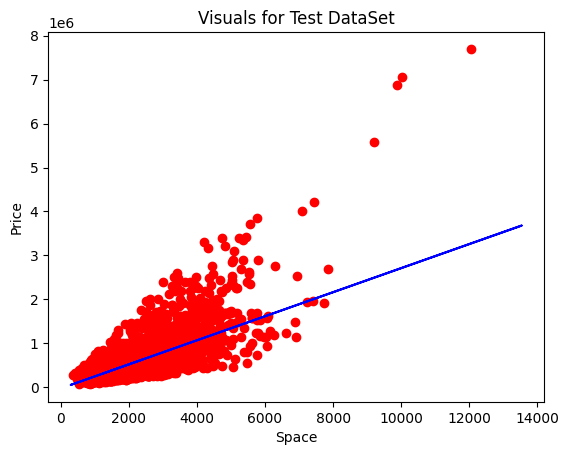

In [ ]:
#Visualisation des résultats du test
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [ ]:
print(regressor.predict([[1190]]))

[296784.47258884]


In [ ]:
print(regressor.predict([[3550]]))

[942956.76287626]


In [ ]:
print(regressor.predict([[2050]]))

[532254.03599866]


In [ ]:
fet=[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long']
x_fet=dataset[fet]
y_tar=dataset['price']

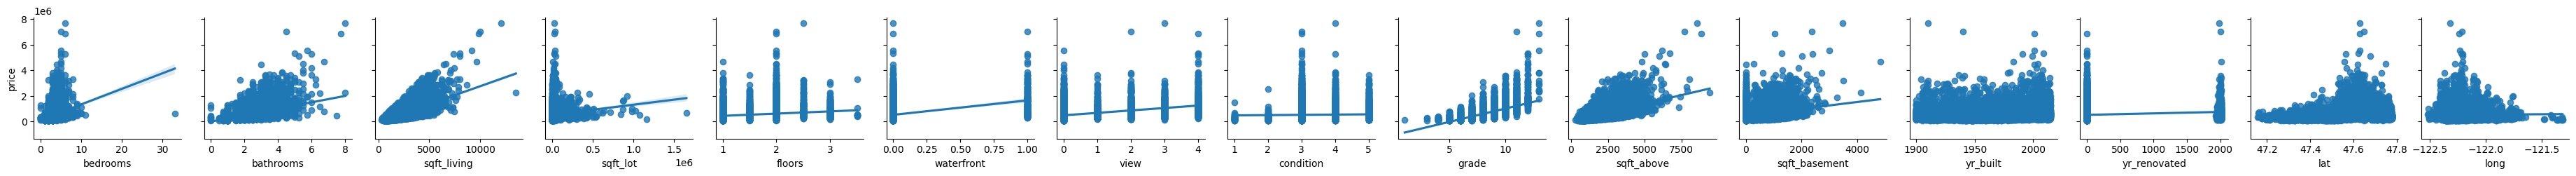

In [ ]:
sns.pairplot(dataset,y_vars="price",x_vars=fet,kind = 'reg',palette='spring')

In [ ]:
X_train, X_test, Y_train, Y_test = tts(x_fet, y_tar, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15129, 15)
(6484, 15)
(15129,)
(6484,)


In [ ]:
clf=lr()
clf.fit(X_train,Y_train)

LinearRegression()

In [ ]:
accuracy=clf.score(X_test,Y_test)

"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 70%'

In [ ]:
from sklearn.linear_model import Ridge as rd

clf1=rd(alpha=0.0001)
clf1.fit(X_train,Y_train)

accuracy1=clf1.score(X_test,Y_test)

"Accuracy1: {}%".format(int(round(accuracy * 100)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.91468e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


'Accuracy1: 70%'

In [ ]:
from sklearn.tree import DecisionTreeRegressor

clf2=DecisionTreeRegressor()
clf2.fit(X_train,Y_train)

accuracy2=clf2.score(X_test,Y_test)

"DecisionTree Accuracy: {}%".format(int(round(accuracy2 * 100)))

'DecisionTree Accuracy: 75%'

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

clf3=KNeighborsRegressor()
clf3.fit(X_train,Y_train)

accuracy3=clf3.score(X_test,Y_test)

"KNeighborsRegressor Accuracy: {}%".format(int(round(accuracy3 * 100)))

'KNeighborsRegressor Accuracy: 52%'

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

clf4=GradientBoostingRegressor()
clf4.fit(X_train,Y_train)

accuracy4=clf4.score(X_test,Y_test)

"GradientBoostingRegressor Accuracy: {}%".format(int(round(accuracy4 * 100)))

'GradientBoostingRegressor Accuracy: 86%'

## ***Prédiction des prix immobiliers à l'aide de Deep learning***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")

In [ ]:
df = df.drop('id',axis=1)


In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [ ]:
df = df.drop('date',axis=1)


In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
X = df.iloc[:,df.columns != 'price']
y = df.iloc[:,df.columns == 'price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
scaler = MinMaxScaler()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=200)

Epoch 1/200
119/119 [==============================] - 2s 5ms/step - loss: 370783092736.0000 - val_loss: 354266218496.0000
Epoch 2/200
119/119 [==============================] - 0s 3ms/step - loss: 284866609152.0000 - val_loss: 257221148672.0000
Epoch 3/200
119/119 [==============================] - 0s 3ms/step - loss: 155797782528.0000 - val_loss: 101113700352.0000
Epoch 4/200
119/119 [==============================] - 0s 4ms/step - loss: 83229663232.0000 - val_loss: 89779511296.0000
Epoch 5/200
119/119 [==============================] - 0s 4ms/step - loss: 77238476800.0000 - val_loss: 84164796416.0000
Epoch 6/200
119/119 [==============================] - 0s 4ms/step - loss: 72568233984.0000 - val_loss: 79195815936.0000
Epoch 7/200
119/119 [==============================] - 0s 3ms/step - loss: 69295104000.0000 - val_loss: 75760844800.0000
Epoch 8/200
119/119 [==============================] - 0s 4ms/step - loss: 66580451328.0000 - val_loss: 73467576320.0000
Epoch 9/200
119/119 [=====

<Axes: >

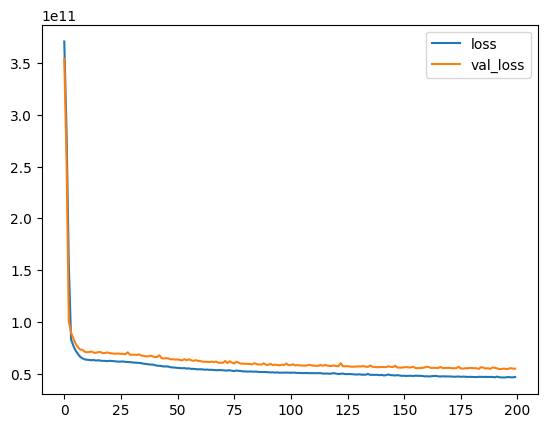

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions = model.predict(X_test)

203/203 [==============================] - 1s 2ms/step


In [ ]:
mean_absolute_error(y_test,predictions)

149122.93220571792

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))


234675.460988526

In [ ]:
explained_variance_score(y_test,predictions)

0.6196703125154848

In [ ]:
df['price'].mean()


540088.1417665294

In [ ]:
df['price'].median()

450000.0